# The Sparks Foundation: Task 1- Prediction using Supervised Machine Learning ( Beginner)

# Name:Aman Agrawal

# GRIPMARCH2023

# Problem statement: Prediction using supervised machine learning. Predict the percentage of an student based on the no of study hours. what will be the predicted score of a student studies for 9.25 hrs/day?

## Hello guys, This is my first Machine Learning project which I'M going to prepare¶

## This project is very simple and also very basic

## Case Study

### We have a client Rohan who is a head of XYZ university. Rohan want his university to come under top 5 university in the world. But to do that he want every student studied in his university should score minimum 90% in all the subjects.

### But probleam is that he don't know how much time students should give to their study to achieve this goal 

### So Rohan decided to take the help of datascientist ,ML enggineers to find the probleam of this solution 

## Mohan a data scientiest understand his probleam and ask him to provide the information related to how much time students have giiven to thier study an based on it how much marks do they score in past years.

# I hope u all have understand the case study.now lets prepare the model which predicts the time a student must invest in their study to acheive the goal

#### Lets import all the required libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset 
data = pd.read_csv("students.csv")

In [4]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.shape

(25, 2)

## Data cleaning

In [7]:
# checking the missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Discover and visualize the data to gain insights

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


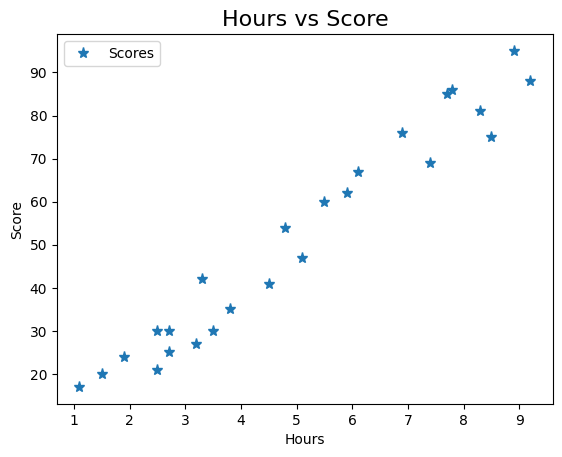

In [10]:
data.plot(x='Hours', y='Scores', style='*',markersize=8)  
plt.title('Hours vs Score', fontsize=16)  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

### we can see that there is a linear relationship between the student_hours and students_marks. In other words it can be said that as the time is increase in study ultimately the marks also increase.

### Based on this visulazing we can get idea that if a student studied more than 9h then he can get 90% marks

## Prepare the data for Machine Learning algorithms

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20,)
shape of X_test =  (5, 1)
shape of y_test =  (5,)


## For this project i will use linear regression model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

###### since our model has been trained, lets test the model by predicting the values

In [15]:
print(X_test) 
print("\n")
y_pred = lr.predict(X_test) 
print(y_pred)


[[5.5]
 [7.7]
 [6.9]
 [8.3]
 [2.7]]


[55.30582657 76.34736893 68.69589898 82.08597139 28.52568176]


In [16]:
y_pred  = lr.predict(X_test)
y_pred

array([55.30582657, 76.34736893, 68.69589898, 82.08597139, 28.52568176])

In [17]:
# Useing pandas librarie to create data frame of Comparing Actual vs Predicted
data2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data2

,Actual,Predicted
0,60,55.305827
1,85,76.347369
2,76,68.695899
3,81,82.085971
4,30,28.525682


In [18]:
lr.score(X_test,y_test)

0.9238518102278781

#### our model has given 95% accuracy which is grt

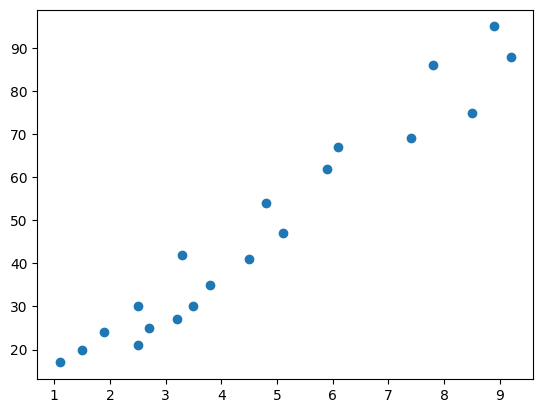

In [19]:
plt.scatter(X_train,y_train)

### lets save our ML model

In [20]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [21]:
model = joblib.load("student_mark_predictor.pkl")

In [22]:
# prediction score
hours = [9.25]
prediction = lr.predict([hours])
print(f"Predicted score is = {prediction[0]}")

Predicted score is = 91.17209195439372


In [23]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
r2_score

0.9238518102278781

In [24]:
# performance of algorithm using mean Absolute Error
from sklearn import metrics  
print( f"Mean Absolute Error : {metrics.mean_absolute_error(y_test, y_pred)}")

Mean Absolute Error : 4.642239029818247


## Hence, the predicted score if a student studies for 9.25 hr/day is 91.17